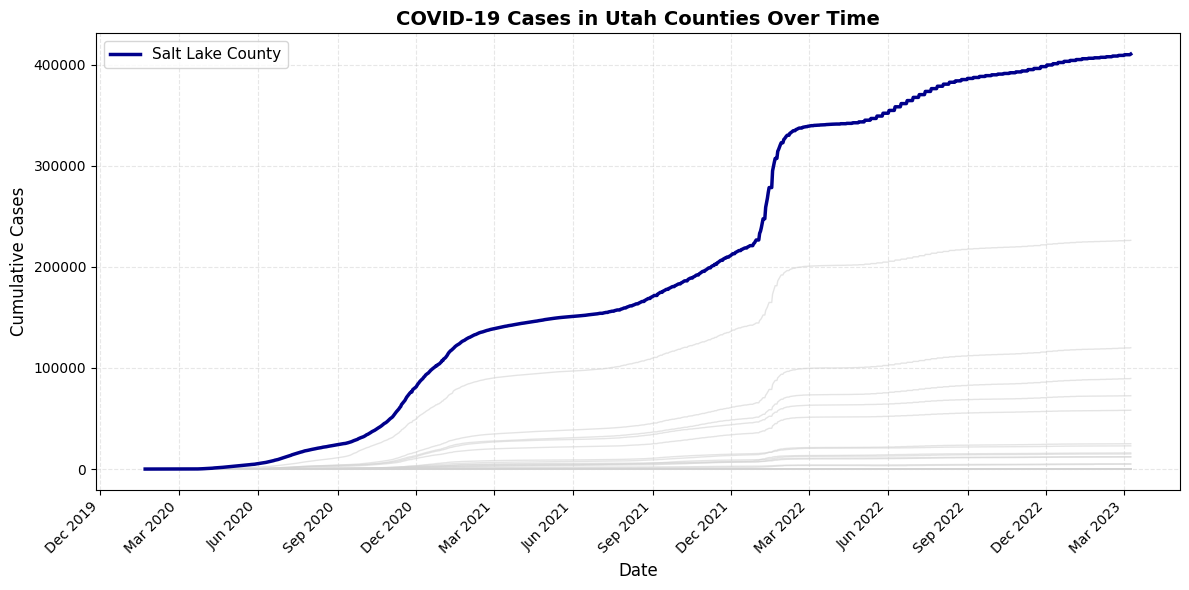

In [16]:
# Visualization 1: Utah Counties Time Series

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load data from Downloads
covid_df = pd.read_csv('/Users/u1024341/Downloads/covid_data.csv')

# Visualization 1: Utah counties time series with one highlighted - Filter for Utah only
utah_data = covid_df[covid_df['Province_State'] == 'Utah'].copy()

# Get date columns
date_columns = [col for col in utah_data.columns if '/' in col]
dates = pd.to_datetime(date_columns, format='%m/%d/%y')

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot all counties in grey
for idx, row in utah_data.iterrows():
    ax.plot(dates, row[date_columns].values, color='lightgrey', alpha=0.6, linewidth=1)

# Highlight Salt Lake County
salt_lake = utah_data[utah_data['Admin2'] == 'Salt Lake']
ax.plot(dates, salt_lake[date_columns].values.flatten(), 
        color='darkblue', linewidth=2.5, label='Salt Lake County', zorder=10)

# Format the plot
ax.set_title('COVID-19 Cases in Utah Counties Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cumulative Cases', fontsize=12)
ax.legend(loc='upper left', fontsize=11)

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45, ha='right')

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()